In [1]:
import apgpy as apg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Generate some data

In [2]:
n = 1000
m = 100
A = np.random.randn(m, n)
b = np.random.randn(m)
mu = 10

Define gradient operator

In [3]:
def quad_grad(y):
    return np.dot(A.T, (np.dot(A, y) - b))

Define proximal operator

In [4]:
def soft_thresh(y, t):
    return np.sign(y) * np.maximum(abs(y) - t * mu, 0)

Solve!

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.08e-04
iter num 100, norm(Gk)/(1+norm(xk)): 6.45e-04, step-size: 1.84e-03
iter num 200, norm(Gk)/(1+norm(xk)): 4.14e-11, step-size: 4.98e-03
iter num 214, norm(Gk)/(1+norm(xk)): 7.93e-13, step-size: 5.73e-03
terminated


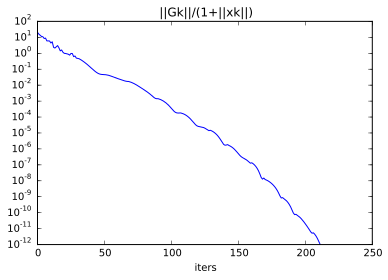

In [5]:
x = apg.solve(quad_grad, soft_thresh, n, use_restart=True, eps=1e-12)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.08e-04
iter num 100, norm(Gk)/(1+norm(xk)): 3.33e-02, step-size: 1.84e-03
iter num 200, norm(Gk)/(1+norm(xk)): 1.93e-03, step-size: 4.98e-03
iter num 300, norm(Gk)/(1+norm(xk)): 3.26e-05, step-size: 5.45e-03
iter num 400, norm(Gk)/(1+norm(xk)): 9.99e-07, step-size: 5.71e-03
iter num 500, norm(Gk)/(1+norm(xk)): 3.09e-07, step-size: 2.83e-03
iter num 600, norm(Gk)/(1+norm(xk)): 1.29e-08, step-size: 3.32e-03
iter num 700, norm(Gk)/(1+norm(xk)): 7.87e-10, step-size: 4.21e-03
iter num 800, norm(Gk)/(1+norm(xk)): 9.16e-11, step-size: 5.63e-03
iter num 874, norm(Gk)/(1+norm(xk)): 4.60e-13, step-size: 4.34e-03
terminated


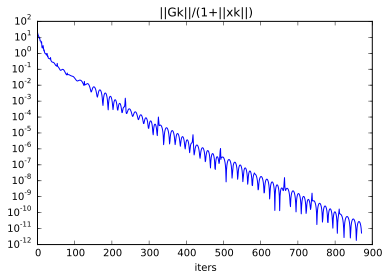

In [6]:
x_no_restart = apg.solve(quad_grad, soft_thresh, n, use_restart=False, eps=1e-12)

Compare to SCS (another first-order solver)

In [7]:
import cvxpy as cp

z = cp.Variable(n)
objective = cp.Minimize(0.5 * cp.sum_squares(A * z - b) + mu * cp.norm(z, 1))
p = cp.Problem(objective)
p.solve(verbose=True, solver=cp.SCS)

----------------------------------------------------------------------------
	SCS v1.1.4 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 104004
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 2002, constraints m = 2104
Cones:	linear vars: 2000
	soc vars: 104, soc blks: 2
Setup time: 4.94e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  4.08e-03 
   100| 1.13e-02  8.36e-03  1.54e-02  3.99e+01  4.12e+01  2.04e-14  1.32e-01 
   200| 7.32e-03  5.06e-03  1.78e-02  3.76e+01  3.90e+01  2.78e-14  2.57e-01 
   300| 6.59e-03  4.50e-03  1.80e-02  3.56e+01  3.70e+01  3

28.303065077247037

Relative error:

In [8]:
print(np.linalg.norm(x - z.value.A1) / np.linalg.norm(x))

0.0470323660601


Print outputs

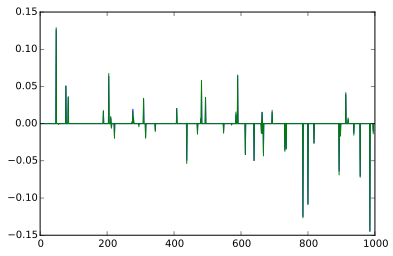

In [9]:
plt.plot(x)
plt.plot(z.value.A1)